In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score



cancer = load_breast_cancer()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
##lets take relevent items for our modeling and convert to dataframe
df1=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df1['target']=cancer.target

In [ ]:
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df1.shape

(569, 31)

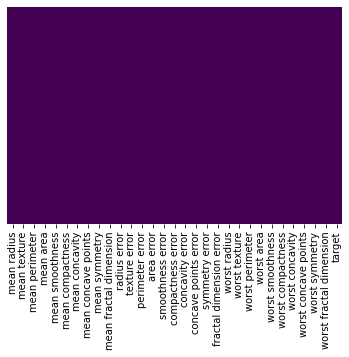

In [ ]:
##lets check missing data 
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#no misiing values

In [ ]:
##lets check for coorelation for the dataset
coor=df1.corr()

In [ ]:
coor

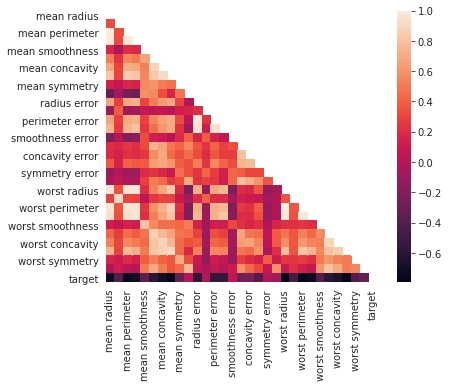

In [ ]:
mask = np.zeros_like(coor)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(coor, mask=mask, vmax=1, square=True)

In [ ]:
##lets check the counts of the target values
#since the target names are represented by 0 and 1 lets give the names to them here
#0 represent malignant and 1 for benign
t=df1['target'].value_counts()
ans = pd.Series([212,357],name='target',index=['malignant','benign'])
ans
#both are two type of cancerous tissues

malignant    212
benign       357
Name: target, dtype: int64

## splitting data to x & y

In [ ]:
y = df1.pop('target')
X = df1

In [ ]:
X.head()

## spliiting x&y to train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## finding the best hyperparameters

In [ ]:
##lets tune the hyper parameters that we want to tune
leaf_size=list(range(1,50))
n_neighbors=list(range(1,50))
p=[1,2]

In [ ]:
##convert to dictionary
hyperparameters=dict(leaf_size=leaf_size,n_neighbors=n_neighbors,p=p)

In [ ]:
##create new knn object 
knn_2=KNeighborsClassifier()

In [ ]:
#use grid search
clf=GridSearchCV(knn_2,hyperparameters,cv=10)

In [ ]:
#fit the model 
best_model=clf.fit(X,y)

In [ ]:
#print the values of best hyper parameters
print('best leaf_size:',best_model.best_estimator_.get_params()['leaf_size'])
print('best p:',best_model.best_estimator_.get_params()['p'])
print('best n_neighbors:',best_model.best_estimator_.get_params()['n_neighbors'])

best leaf_size: 1
best p: 1
best n_neighbors: 6


In [ ]:
#lets use the best hyperparameters to bulid the modle
knn = KNeighborsClassifier(n_neighbors = 6,leaf_size=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
##predict test dataset

y_pred=knn.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
##checking the perforance of our model with classification report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      0.92      0.90        53
           1       0.95      0.92      0.94        90

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



In [ ]:
#roc value
roc_auc_score(y_test,y_pred)

0.9233752620545074

In [ ]:
##0- malignant, 1-benign
##precision=TP/TP+FP
#RECALL=TP/TP+FN
#ACCURACY=2.TP/2.TP+FN+FP
##POSITIVE=1 & NEGATIVE =0

y_test.value_counts()

In [ ]:
##y_test.dtype

In [ ]:
##(unique, counts) = np.unique(y_pred, return_counts=True)

frequencies = np.asarray((unique, counts)).T

In [ ]:
##print(frequencies)

In [ ]:
#lets bulid a confusion matrix to find out classification
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[49,  4],
       [ 7, 83]])

In [ ]:
##POSITIVE=1 & NEGATIVE =0

#TN=49  FP=4

#FN=7   TP=83

applying minmax scaling to scale the features to one scale

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn1= KNeighborsClassifier(n_neighbors = 6)
knn1.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
y1_pred=knn1.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        53
           1       0.95      0.98      0.96        90

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In [ ]:
roc_auc_score(y_test,y1_pred)

0.9417190775681342

In [ ]:
##we can see that the accuracy has increased
confusion_matrix(y_test,y1_pred)

array([[48,  5],
       [ 2, 88]])